# Wavelet transform

### Imports

In [16]:
import pywt
from matplotlib import pyplot as plt
import utils
import pandas as pd
import numpy as np

### Load data

In [2]:
df = utils.load_mavir_data()

### Format data

In [3]:
# standardize power
df['Power'] = utils.standardize(df['Power'])

# chose the first n datapoints as a sample
sample = utils.sample(df, 100, start_idx=0)

### Wavelet transform
Without interpolation.

In [4]:
coefs = utils.apply_wavelet(sample['Power'], 'haar')

### Display decomposed data

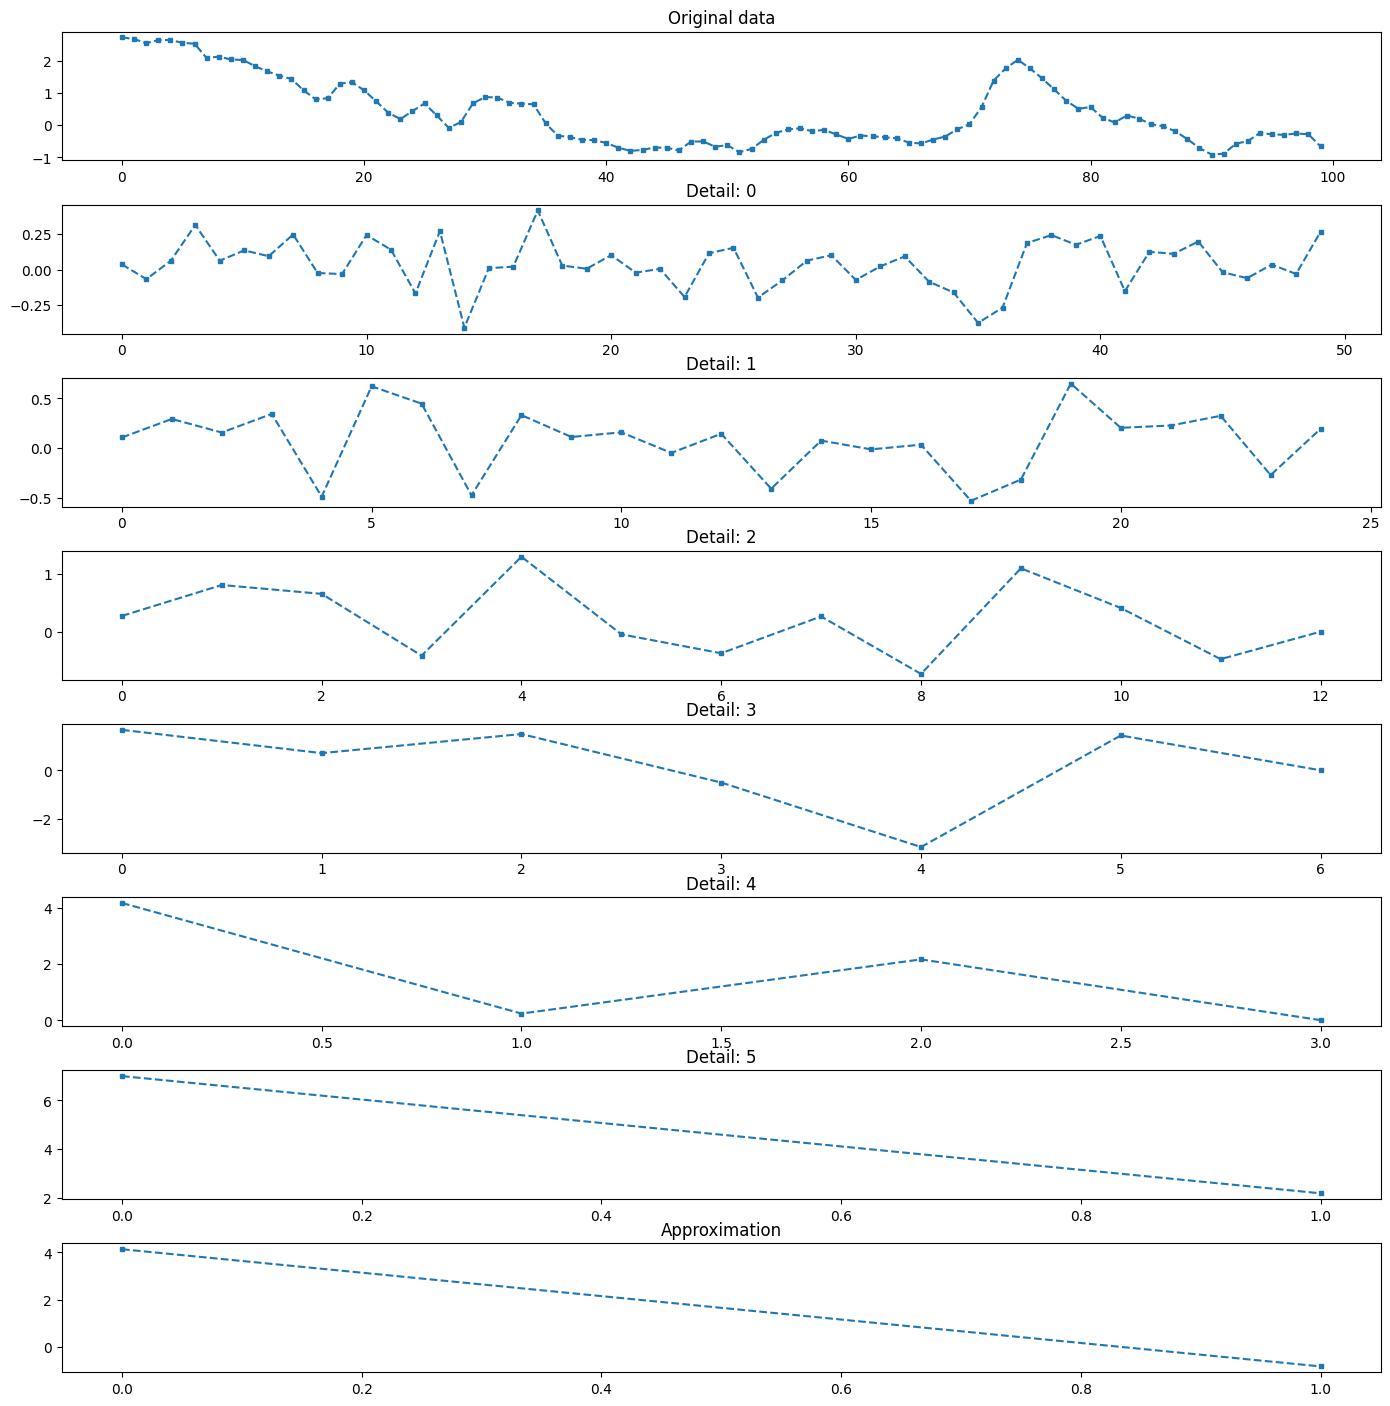

In [5]:
plt.rcParams['figure.figsize'] = [14, 14]

fig, axs = plt.subplots(len(coefs) + 1)
fig.tight_layout()

axs[0].plot(sample['Power'], marker='s', linestyle='--', markersize=3)
axs[0].set_title('Original data')

for idx, (ax, det) in enumerate(zip(axs[1:-1], reversed(coefs[1:]))):
    ax.plot(det, marker='s', linestyle='--', markersize=3)
    ax.set_title(f'Detail: {idx}')

axs[-1].plot(coefs[0], marker='s', linestyle='--', markersize=3)
axs[-1].set_title('Approximation')

plt.show()

### Wavelet transform
With interpolation

In [8]:
interpolated = utils.apply_wavelet(sample['Power'], 'haar', 'akima', decomp_lvl=4)

### Display decomposed data

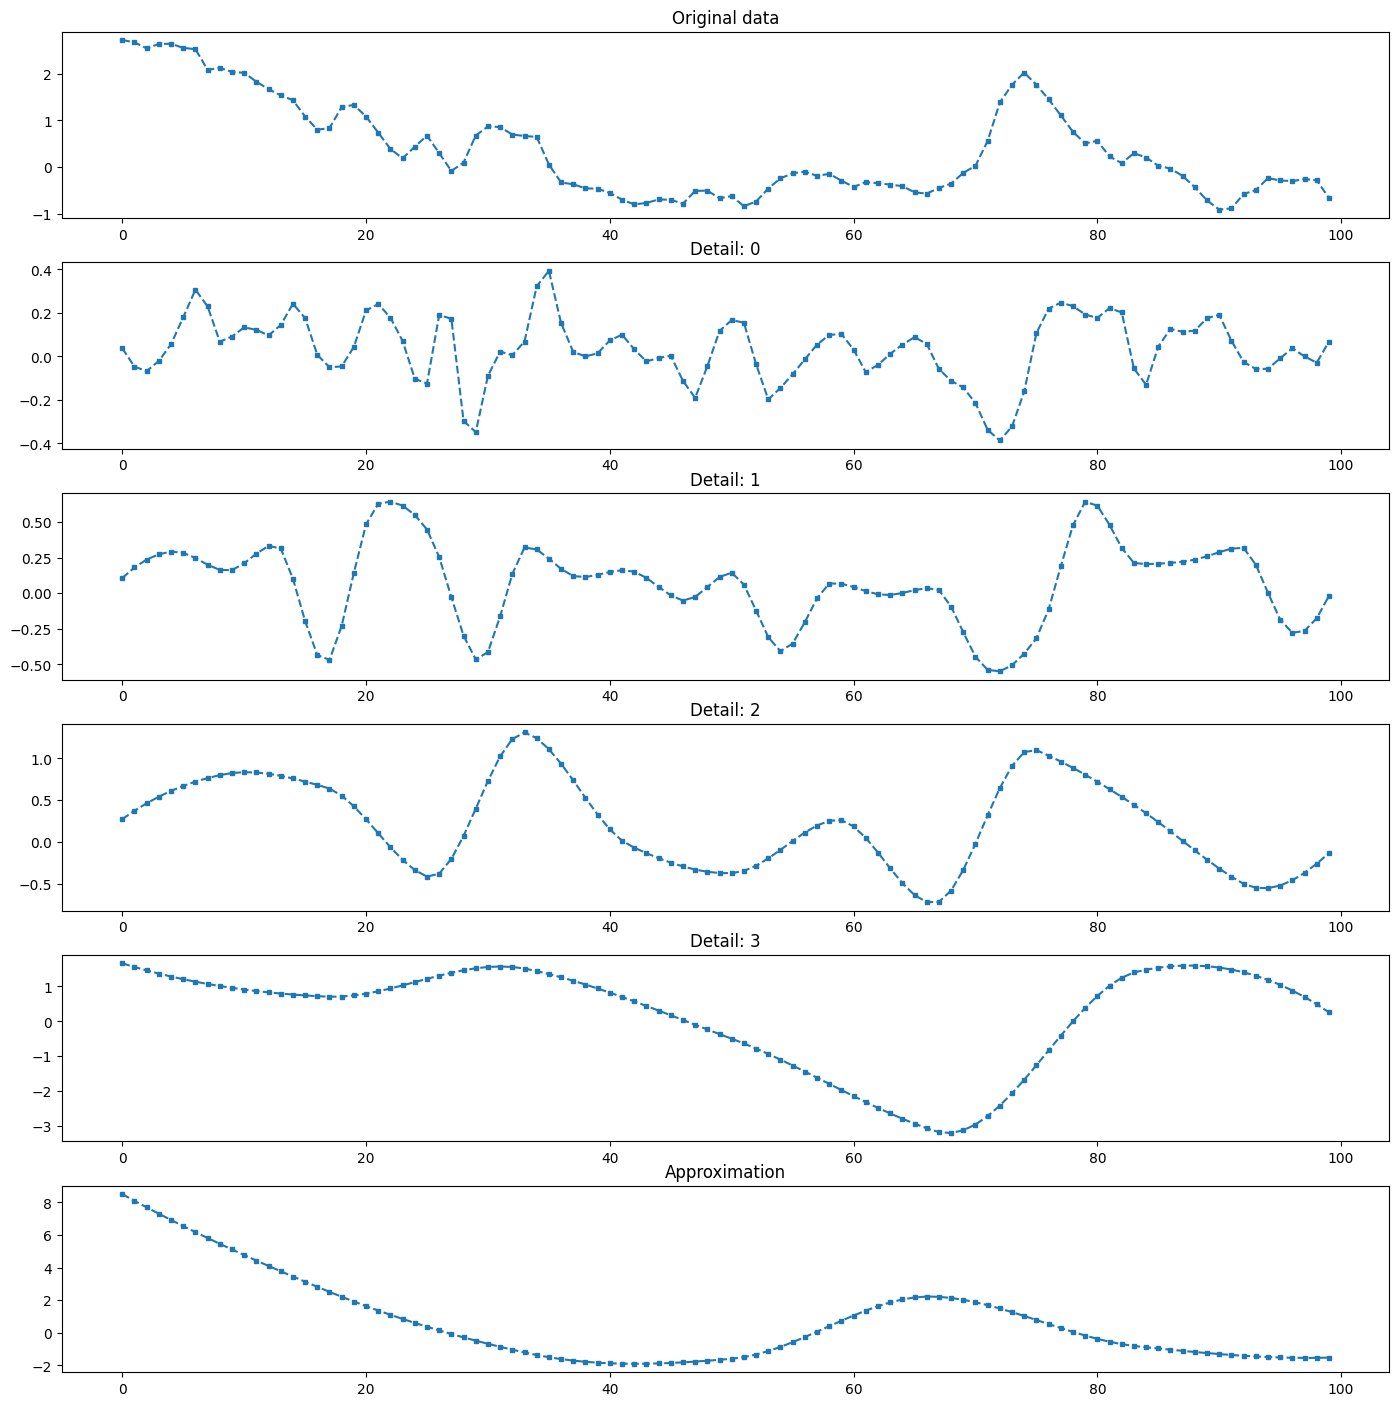

In [9]:
plt.rcParams['figure.figsize'] = [14, 14]

fig, axs = plt.subplots(len(interpolated) + 1)
fig.tight_layout()

axs[0].plot(sample['Power'], marker='s', linestyle='--', markersize=3)
axs[0].set_title('Original data')

for idx, (ax, det) in enumerate(zip(axs[1:-1], reversed(interpolated[1:]))):
    ax.plot(det, marker='s', linestyle='--', markersize=3)
    ax.set_title(f'Detail: {idx}')

axs[-1].plot(interpolated[0], marker='s', linestyle='--', markersize=3)
axs[-1].set_title('Approximation')

plt.show()

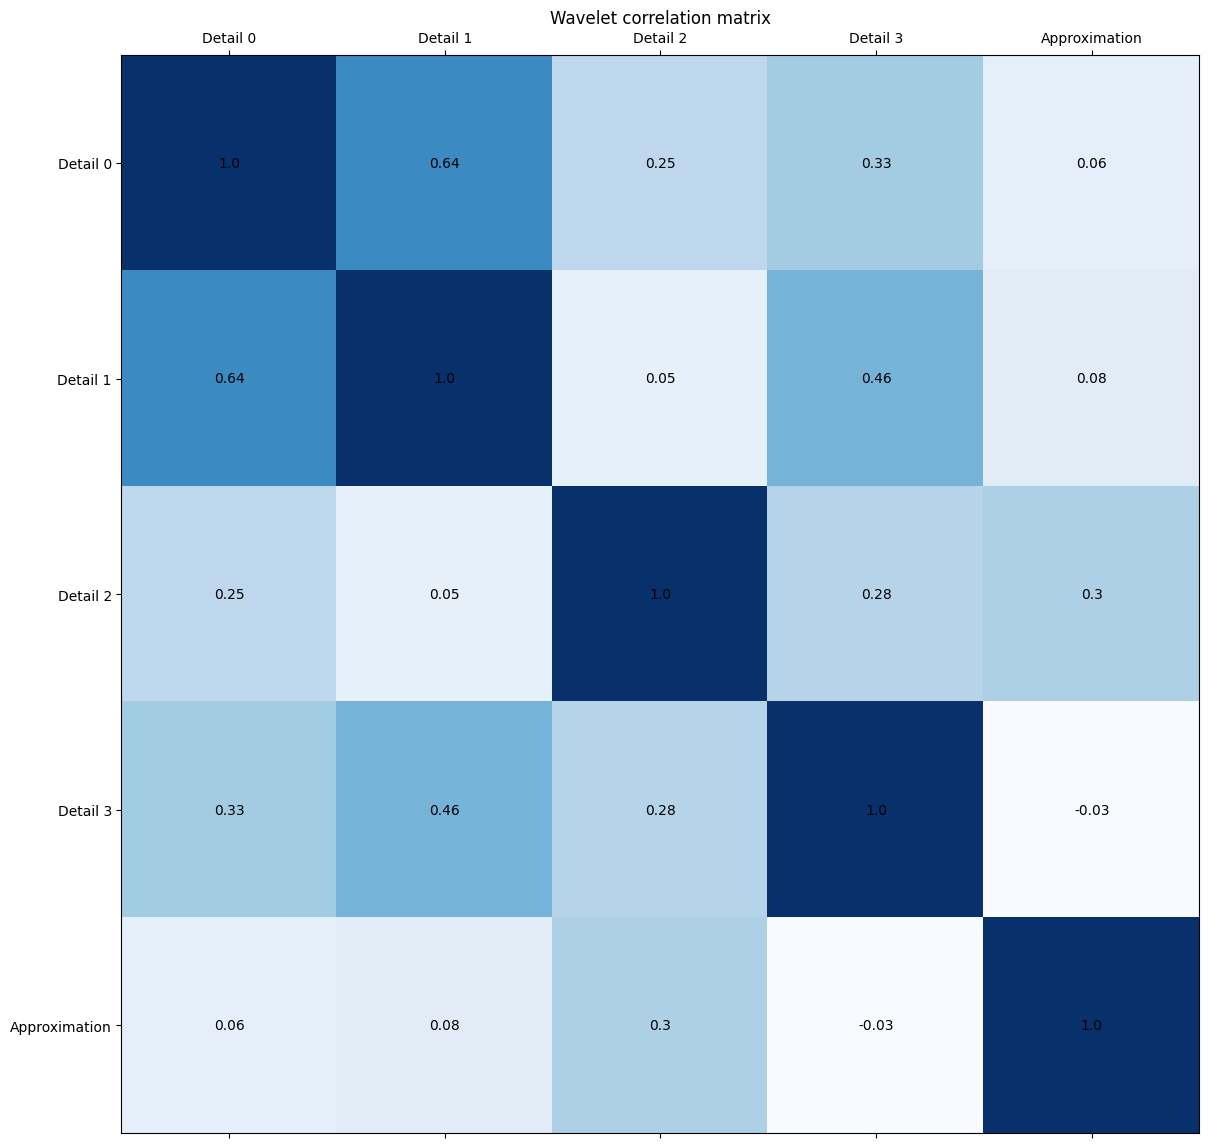

In [37]:
interp = np.array(interpolated)
corr = pd.DataFrame(interp[::-1, :].T, columns=[f'Detail-{i}' for i in range(interp.shape[0] - 1)] + ['Approximation']).corr().to_numpy()

fig, ax = plt.subplots()

ax.matshow(corr, cmap=plt.cm.Blues)

for i in range(interp.shape[0]):
    for j in range(interp.shape[0]):
        c = corr[j,i]
        ax.text(i, j, str(round(c, 2)), va='center', ha='center')

ax.set_yticks(np.arange(interp.shape[0]))
ax.set_xticks(np.arange(interp.shape[0]))
ax.set_yticklabels([f'Detail {i}' for i in range(interp.shape[0] - 1)] + ['Approximation'])
ax.set_xticklabels([f'Detail {i}' for i in range(interp.shape[0] - 1)] + ['Approximation'])

ax.set_title('Wavelet correlation matrix')
plt.show()